#NBA Dataset Statistics Analysis
#####Created in Google Colaboratory by Nikolas Rakryan Widagdo

In [256]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Pre-processing

###Loading necessary libraries

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Loading the dataset

In [258]:
df=pd.read_csv("https://raw.githubusercontent.com/Syukrondzeko/Fellowship/main/Seasons_Stats.csv",index_col=0)

###Description about the dataset

In [259]:
df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,12.9,9.1,1.8,3.0,10.9,15.5,NaN,3.4,2.2,5.6,0.157,NaN,-0.2,2.3,2.1,1.8,253.0,443.0,0.571,0.0,1.0,0.000,253.0,442.0,0.572,0.571,133.0,196.0,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,13.2,12.2,0.7,3.3,10.2,16.5,NaN,0.5,0.6,1.0,0.094,NaN,-3.2,0.8,-2.5,-0.1,78.0,158.0,0.494,0.0,1.0,0.000,78.0,157.0,0.497,0.494,22.0,39.0,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,NaN,-0.1,0.1,0.0,-0.005,NaN,-7.8,0.4,-7.3,-0.1,10.0,31.0,0.323,0.0,0.0,NaN,10.0,31.0,0.323,0.323,3.0,5.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,NaN,-0.3,0.8,0.5,0.030,NaN,-3.6,-0.1,-3.7,-0.4,88.0,221.0,0.398,33.0,99.0,0.333,55.0,122.0,0.451,0.473,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [260]:
df.describe()

,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,20792.000000,20792.000000,21571.000000,22555.000000,20792.000000,20792.000000,19582.000000,19640.000000,0.0,24585.000000,24585.000000,24585.000000,24101.000000,0.0,20797.000000,20797.000000,20797.000000,20797.000000,24624.000000,24624.000000,24525.000000,18927.000000,18927.000000,15416.000000,24624.000000,24624.000000,24496.000000,24525.000000,24624.000000,24624.000000,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
mean,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,6.181565,13.708657,9.949210,13.009962,1.648269,1.410624,15.085099,18.906492,NaN,1.257307,1.227395,2.485796,0.065002,NaN,-1.778386,-0.548570,-2.326720,0.559879,195.325820,430.645752,0.430817,22.215037,63.604480,0.248796,178.250447,381.756782,0.445343,0.450658,102.389336,136.775219,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,4.872685,6.636402,5.040283,9.191843,1.017024,1.773348,6.919170,5.448157,NaN,2.136256,1.269613,3.058638,0.102471,NaN,3.792947,2.253106,4.691619,1.336892,188.114361,397.624715,0.095921,38.543366,102.442769,0.176683,179.478923,371.260335,0.099803,0.099200,113.373565,146.078918,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-5.100000,-1.000000,-2.800000,-2.519000,NaN,-73.800000,-30.400000,-86.700000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,2.600000,8.800000,5.900000,6.500000,1.100000,0.300000,11.400000,15.400000,NaN,-0.100000,0.200000,0.200000,0.031000,NaN,-3.400000,-1.700000,-4.200000,-0.200000,41.000000,99.000000,0.393000,0.000000,1.000000,0.100000,35.000000,82.000000,0.407000,0.414000,18.000000,27.000000,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,5.400000,12.700000,9.200000,10.500000,1.500000,0.900000,14.200000,18.600000,NaN,0.400000,0.800000,1.400000,0.075000,NaN,-1.500000,-0.500000,-1.800000,0.000000,141.000000,321.000000,0.439000,2.000000,11.000000,0.292000,122.000000,270.000000,0.456000,0.463000,63.000000,88.000000,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,9.000000,18.100000,13.500000,17.600000,2.100000,1.900000,17.700000,22.200000,NaN,1.900000,1.800000,3.800000,0.115000,NaN,0.300000,0.700000,0.300000,0.900000,299.000000,661.000000,0.480000,27.000000,84.000000,0.363000,268.000000,579.250000,0.496000,0.501000,149.000000,201.000000,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000
max,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,100.000000,100.000000,100.000000,100.000000,24.200000,77.800000,100.000000,100.000000,NaN,18.300000,16.000000,25.400000,2.123000,NaN,47.800000,46.800000,36.200000,12.400000,1597.000000,3159.000000,1.000000,402.000000,886.000000,1.000000,1597.000000,3159

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24691 entries, 0 to 24690
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     24585 non-null  float64
 22

###Focusing the dataset on the NBA season in the year 2017

In [262]:
df=pd.DataFrame(df.loc[df["Year"]==2017])
df=df.reset_index(drop=True)
df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,0.560,0.724,0.144,1.9,7.1,4.5,5.5,1.7,0.6,8.3,15.9,NaN,1.2,0.9,2.1,0.095,NaN,-0.3,-2.2,-2.5,-0.1,134.0,341.0,0.393,94.0,247.0,0.381,40.0,94.0,0.426,0.531,44.0,49.0,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
1,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,11.8,0.565,0.529,0.353,3.9,18.0,11.0,4.9,1.2,2.0,9.7,16.8,NaN,0.5,0.5,0.9,0.082,NaN,-1.8,-1.2,-3.0,-0.1,70.0,170.0,0.412,37.0,90.0,0.411,33.0,80.0,0.413,0.521,45.0,60.0,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
2,2017.0,Quincy Acy,PF,26.0,DAL,6.0,0.0,48.0,-1.4,0.355,0.412,0.176,4.6,15.2,9.7,0.0,0.0,0.0,9.8,20.0,NaN,-0.2,0.0,-0.1,-0.133,NaN,-10.1,-6.0,-16.2,-0.2,5.0,17.0,0.294,1.0,7.0,0.143,4.0,10.0,0.400,0.324,2.0,3.0,0.667,2.0,6.0,8.0,0.0,0.0,0.0,2.0,9.0,13.0
3,2017.0,Quincy Acy,PF,26.0,BRK,32.0,1.0,510.0,13.1,0.587,0.542,0.373,3.8,18.2,11.1,5.4,1.3,2.2,9.6,16.5,NaN,0.6,0.5,1.1,0.102,NaN,-1.1,-0.7,-1.8,0.0,65.0,153.0,0.425,36.0,83.0,0.434,29.0,70.0,0.414,0.542,43.0,57.0,0.754,18.0,89.0,107.0,18.0,14.0,15.0,19.0,58.0,209.0
4,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,0.589,0.002,0.392,13.0,15.5,14.2,5.4,1.8,2.6,16.0,16.2,NaN,3.3,3.1,6.4,0.130,NaN,-0.7,1.2,0.5,1.5,374.0,655.0,0.571,0.0,1.0,0.000,374.0,654.0,0.572,0.571,157.0,257.0,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,12.9,9.1,1.8,3.0,10.9,15.5,NaN,3.4,2.2,5.6,0.157,NaN,-0.2,2.3,2.1,1.8,253.0,443.0,0.571,0.0,1.0,0.000,253.0,442.0,0.572,0.571,133.0,196.0,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
591,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,13.2,12.2,0.7,3.3,10.2,16.5,NaN,0.5,0.6,1.0,0.094,NaN,-3.2,0.8,-2.5,-0.1,78.0,158.0,0.494,0.0,1.0,0.000,78.0,157.0,0.497,0.494,22.0,39.0,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
592,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,NaN,-0.1,0.1,0.0,-0.005,NaN,-7.8,0.4,-7.3,-0.1,10.0,31.0,0.323,0.0,0.0,NaN,10.0,31.0,0.323,0.323,3.0,5.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
593,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,NaN,-0.3,0.8,0.5,0.030,NaN,-3.6,-0.1,-3.7,-0.4,88.0,221.0,0.398,33.0,99.0,0.333,55.0,122.0,0.451,0.473,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


###Checking for duplicates of data

In [263]:
df["Player"].value_counts()

Lance Stephenson    4
Ersan Ilyasova      4
Omri Casspi         4
Andrew Nicholson    3
Edy Tavares         3
                   ..
Andrew Wiggins      1
Nikola Vucevic      1
Joe Ingles          1
Kosta Koufos        1
James Young         1
Name: Player, Length: 486, dtype: int64

In [264]:
df=df.drop_duplicates("Player", keep='first')
df=df.reset_index(drop=True)

In [265]:
df["Player"].value_counts()

Jeff Withey          1
Jabari Parker        1
Okaro White          1
Marc Gasol           1
Nikola Mirotic       1
                    ..
Al Horford           1
Treveon Graham       1
Stephen Curry        1
Cristiano Felicio    1
James Young          1
Name: Player, Length: 486, dtype: int64

###Checking columns for missing values in the dataset

In [266]:
df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [267]:
df.isna().sum()

Year        0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
PER         0
TS%         1
3PAr        1
FTr         1
ORB%        0
DRB%        0
TRB%        0
AST%        0
STL%        0
BLK%        0
TOV%        1
USG%        0
blanl     486
OWS         0
DWS         0
WS          0
WS/48       0
blank2    486
OBPM        0
DBPM        0
BPM         0
VORP        0
FG          0
FGA         0
FG%         1
3P          0
3PA         0
3P%        36
2P          0
2PA         0
2P%         2
eFG%        1
FT          0
FTA         0
FT%        15
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

In [268]:
df.columns[df.isna().any()]

Index(['TS%', '3PAr', 'FTr', 'TOV%', 'blanl', 'blank2', 'FG%', '3P%', '2P%',
       'eFG%', 'FT%'],
      dtype='object')

In [269]:
#counting missing values in columns in percentage
misspercent=round(df.isna().mean()*100,2).sort_values(ascending=False)
misspercent=misspercent[misspercent>0]
misspercent

blank2    100.00
blanl     100.00
3P%         7.41
FT%         3.09
2P%         0.41
TS%         0.21
TOV%        0.21
FG%         0.21
FTr         0.21
eFG%        0.21
3PAr        0.21
dtype: float64

In [270]:
#dropping columns which has more than 50% missing values
df.drop(['blank2','blanl'],axis=1, inplace=True)
df.shape

(486, 50)

###Dealing with missing variables

In [271]:
df.columns[df.isna().any()]

Index(['TS%', '3PAr', 'FTr', 'TOV%', 'FG%', '3P%', '2P%', 'eFG%', 'FT%'], dtype='object')

In [272]:
#checking data type of each missing variables
df[['TS%', '3PAr', 'FTr', 'TOV%', 'FG%', '3P%', '2P%', 'eFG%', 'FT%']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TS%     485 non-null    float64
 1   3PAr    485 non-null    float64
 2   FTr     485 non-null    float64
 3   TOV%    485 non-null    float64
 4   FG%     485 non-null    float64
 5   3P%     450 non-null    float64
 6   2P%     484 non-null    float64
 7   eFG%    485 non-null    float64
 8   FT%     471 non-null    float64
dtypes: float64(9)
memory usage: 34.3 KB


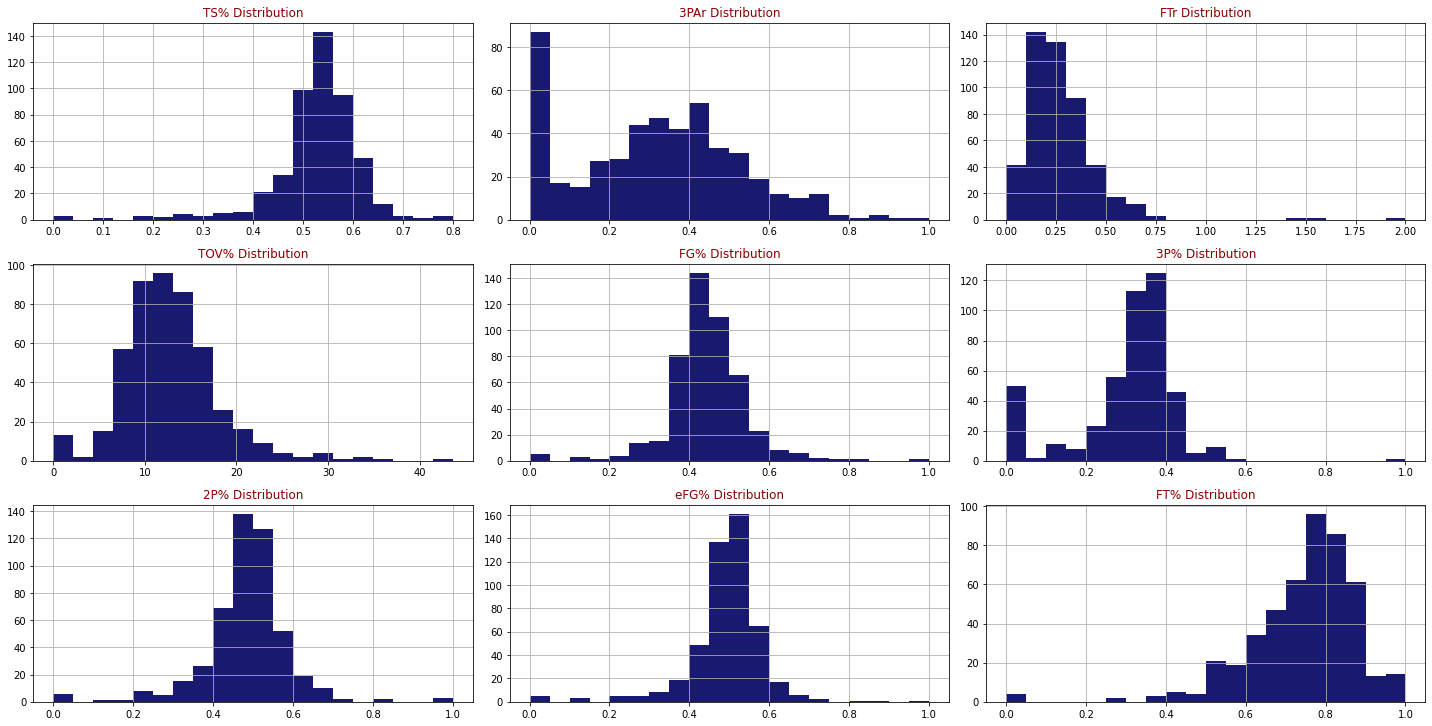

In [273]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df[['TS%', '3PAr', 'FTr', 'TOV%', 'FG%', '3P%', '2P%', 'eFG%', 'FT%']],6,3)

In [274]:
#imputing mean for numerical variables
miss=df[['TS%', '3PAr', 'FTr', 'TOV%', 'FG%', '3P%', '2P%', 'eFG%', 'FT%']]


for col in miss:
  df[col].fillna(df[col].mean(),inplace=True)

In [275]:
df.columns[df.isnull().any()]

Index([], dtype='object')

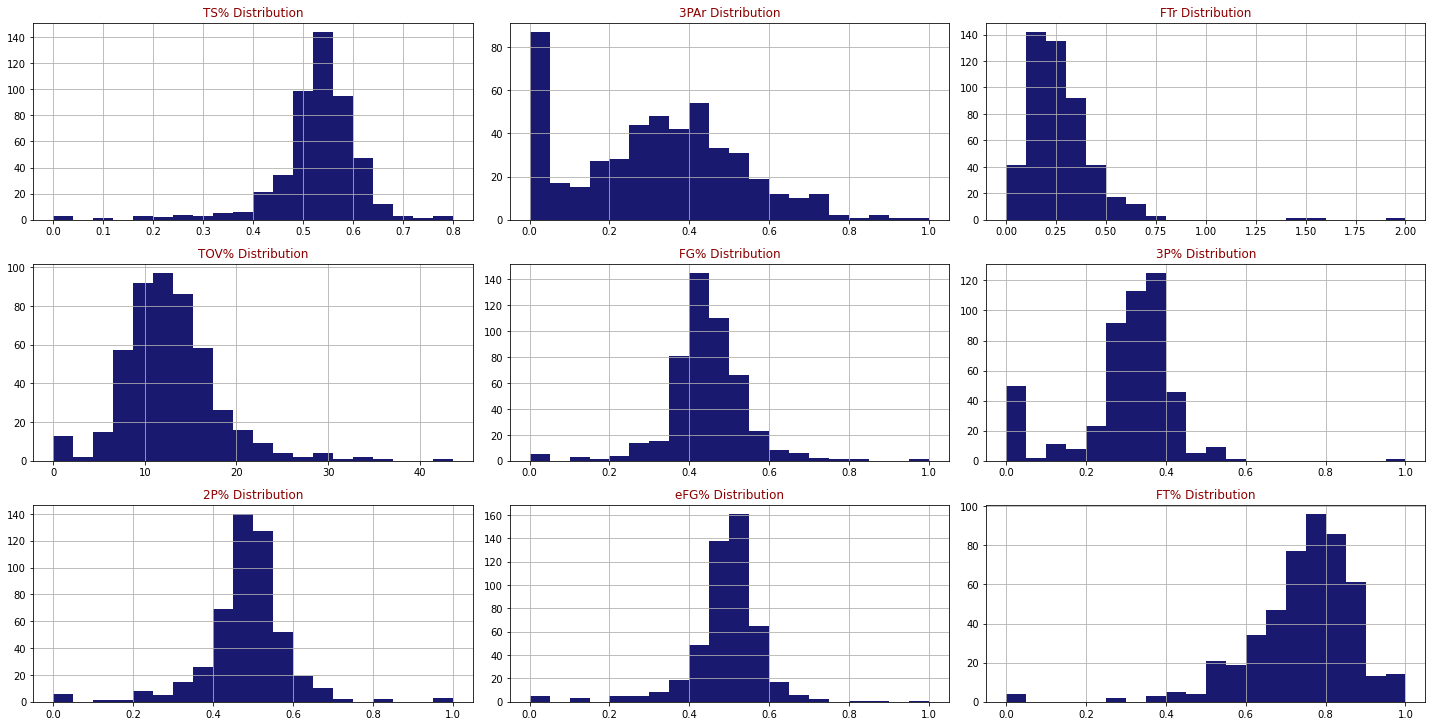

In [276]:
draw_histograms(df,df[['TS%', '3PAr', 'FTr', 'TOV%', 'FG%', '3P%', '2P%', 'eFG%', 'FT%']],6,3)

##Exploratory Data Analysis

###1.	Who is the youngest and oldest player in the NBA in 2017 for each team (Tm) ?

In [277]:
df["Tm"].unique()

array(['OKC', 'TOT', 'SAC', 'NOP', 'MIN', 'SAS', 'IND', 'MEM', 'POR',
       'CLE', 'LAC', 'HOU', 'MIL', 'NYK', 'DEN', 'ORL', 'MIA', 'PHO',
       'DAL', 'CHO', 'PHI', 'DET', 'ATL', 'WAS', 'BRK', 'LAL', 'UTA',
       'BOS', 'CHI', 'TOR', 'GSW'], dtype=object)

In [278]:
for i in df["Tm"].unique():
  print("Team= ",i,"  Youngest= ",df["Age"].loc[df['Tm'] == i].min(),"  Oldest= ",df["Age"].loc[df['Tm'] == i].max(),sep="")

Team= OKC  Youngest= 20.0  Oldest= 36.0
Team= TOT  Youngest= 21.0  Oldest= 36.0
Team= SAC  Youngest= 19.0  Oldest= 31.0
Team= NOP  Youngest= 20.0  Oldest= 33.0
Team= MIN  Youngest= 20.0  Oldest= 34.0
Team= SAS  Youngest= 20.0  Oldest= 39.0
Team= IND  Youngest= 20.0  Oldest= 32.0
Team= MEM  Youngest= 20.0  Oldest= 40.0
Team= POR  Youngest= 21.0  Oldest= 28.0
Team= CLE  Youngest= 21.0  Oldest= 38.0
Team= LAC  Youngest= 19.0  Oldest= 39.0
Team= HOU  Youngest= 20.0  Oldest= 34.0
Team= MIL  Youngest= 19.0  Oldest= 39.0
Team= NYK  Youngest= 21.0  Oldest= 32.0
Team= DEN  Youngest= 19.0  Oldest= 36.0
Team= ORL  Youngest= 20.0  Oldest= 32.0
Team= MIA  Youngest= 20.0  Oldest= 36.0
Team= PHO  Youngest= 19.0  Oldest= 34.0
Team= DAL  Youngest= 21.0  Oldest= 38.0
Team= CHO  Youngest= 21.0  Oldest= 31.0
Team= PHI  Youngest= 21.0  Oldest= 32.0
Team= DET  Youngest= 20.0  Oldest= 34.0
Team= ATL  Youngest= 22.0  Oldest= 32.0
Team= WAS  Youngest= 21.0  Oldest= 32.0
Team= BRK  Youngest= 21.0  Oldest= 36.0


In [279]:
#Selecting the relevant columns
df1=df[["Tm","Player","Age"]].set_index("Tm")
df1

,Player,Age
Tm,,
OKC,Alex Abrines,23.0
TOT,Quincy Acy,26.0
OKC,Steven Adams,23.0
SAC,Arron Afflalo,31.0
NOP,Alexis Ajinca,28.0
...,...,...
CHO,Cody Zeller,24.0
BOS,Tyler Zeller,27.0
ORL,Stephen Zimmerman,20.0


In [280]:
#Finding out the youngest player for each team
Yplayer=df1[df1.groupby("Tm")["Age"].transform("min")==df1["Age"]].sort_values(by=["Tm"])
Yplayer

,Player,Age
Tm,,
ATL,DeAndre' Bembry,22.0
ATL,Taurean Waller-Prince,22.0
BOS,Jaylen Brown,20.0
BRK,Isaiah Whitehead,21.0
CHI,Bobby Portis,21.0
CHO,Christian Wood,21.0
CLE,Kay Felder,21.0
DAL,Ben Bentil,21.0
DEN,Jamal Murray,19.0


In [281]:
#Finding out the oldest player for each team
Oplayer=df1[df1.groupby("Tm")["Age"].transform("max")==df1["Age"]].sort_values(by=["Tm"])
Oplayer

,Player,Age
Tm,,
ATL,Thabo Sefolosha,32.0
ATL,Gary Neal,32.0
BOS,Gerald Green,31.0
BRK,Luis Scola,36.0
CHI,Dwyane Wade,35.0
CHO,Brian Roberts,31.0
CLE,Chris Andersen,38.0
DAL,Dirk Nowitzki,38.0
DEN,Mike Miller,36.0


###2.	Which player has the most minutes played (MP) in each position (Pos)? 

In [282]:
#Selecting the relevant columns
df2=df[["Pos","Player","MP"]].set_index("Pos")
df2

,Player,MP
Pos,,
SG,Alex Abrines,1055.0
PF,Quincy Acy,558.0
C,Steven Adams,2389.0
SG,Arron Afflalo,1580.0
C,Alexis Ajinca,584.0
...,...,...
PF,Cody Zeller,1725.0
C,Tyler Zeller,525.0
C,Stephen Zimmerman,108.0


In [283]:
#Finding out player with the most minutes played based on each position
PlayerwithmostMP=df2[df2.groupby("Pos")["MP"].transform("max")==df2["MP"]]
PlayerwithmostMP

,Player,MP
Pos,,
PF,Harrison Barnes,2803.0
PG,James Harden,2947.0
PF-C,Joffrey Lauvergne,980.0
SG,C.J. McCollum,2796.0
C,Karl-Anthony Towns,3030.0
SF,Andrew Wiggins,3048.0


###3.	Which team has the highest average total rebound percentage (TRB%), assist percentage (AST%), steal percentage (STL%), and block percentage (BLK%)? 

In [284]:
#Selecting the relevant columns
df3=df[["Tm","TRB%","AST%","STL%","BLK%"]]
df3

,Tm,TRB%,AST%,STL%,BLK%
0,OKC,4.5,5.5,1.7,0.6
1,TOT,11.0,4.9,1.2,2.0
2,OKC,14.2,5.4,1.8,2.6
3,SAC,4.6,7.4,0.7,0.4
4,NOP,16.0,3.1,1.7,3.1
...,...,...,...,...,...
481,CHO,12.9,9.1,1.8,3.0
482,BOS,13.2,12.2,0.7,3.3
483,ORL,17.6,5.3,0.9,3.7
484,CHI,8.0,6.1,0.9,1.5


In [285]:
#Finding the average for each team
averagehigh=df3.groupby(["Tm"]).mean().sort_values(by=["TRB%","AST%","STL%","BLK%"],ascending=False)
averagehigh

,TRB%,AST%,STL%,BLK%
Tm,,,,
WAS,13.450000,11.314286,1.535714,1.292857
GSW,11.426667,13.960000,1.733333,2.740000
NYK,11.192857,11.921429,1.507143,1.964286
LAL,10.921429,11.942857,1.692857,1.585714
PHI,10.860000,15.040000,1.333333,1.786667
TOR,10.671429,11.571429,1.928571,1.978571
DEN,10.600000,15.860000,1.880000,0.953333
LAC,10.586667,12.033333,1.993333,2.053333
OKC,10.450000,13.891667,1.483333,1.800000


In [286]:
average=pd.DataFrame(averagehigh.idxmax(),columns=["Team"],)
average

,Team
TRB%,WAS
AST%,DEN
STL%,MIN
BLK%,GSW


###4.	Who is the best player in your opinion based on his record stats? note: you can refer to variables point (PTS), assists, rebounds, or anything else. A combination of several variables would be nice. 

Features that are taken into account are based on the following articles:
https://www.nba.com/stats/alltime/
https://fadeawayworld.net/nba/ranking-the-top-15-best-players-in-nba-history-with-combined-stats

In [287]:
#Selecting the relevant columns
df4=df[["Player","Tm","PTS","G","GS","AST","AST%","STL","STL%","ORB","ORB%","DRB","DRB%","TRB","TRB%","BLK","BLK%","TOV","TOV%"]]
df4

,Player,Tm,PTS,G,GS,AST,AST%,STL,STL%,ORB,ORB%,DRB,DRB%,TRB,TRB%,BLK,BLK%,TOV,TOV%
0,Alex Abrines,OKC,406.0,68.0,6.0,40.0,5.5,37.0,1.7,18.0,1.9,68.0,7.1,86.0,4.5,8.0,0.6,33.0,8.3
1,Quincy Acy,TOT,222.0,38.0,1.0,18.0,4.9,14.0,1.2,20.0,3.9,95.0,18.0,115.0,11.0,15.0,2.0,21.0,9.7
2,Steven Adams,OKC,905.0,80.0,80.0,86.0,5.4,88.0,1.8,282.0,13.0,333.0,15.5,615.0,14.2,78.0,2.6,146.0,16.0
3,Arron Afflalo,SAC,515.0,61.0,45.0,78.0,7.4,21.0,0.7,9.0,0.7,116.0,8.4,125.0,4.6,7.0,0.4,42.0,8.4
4,Alexis Ajinca,NOP,207.0,39.0,15.0,12.0,3.1,20.0,1.7,46.0,8.3,131.0,23.8,177.0,16.0,22.0,3.1,31.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Cody Zeller,CHO,639.0,62.0,58.0,99.0,9.1,62.0,1.8,135.0,8.6,270.0,17.3,405.0,12.9,58.0,3.0,65.0,10.9
482,Tyler Zeller,BOS,178.0,51.0,5.0,42.0,12.2,7.0,0.7,43.0,9.2,81.0,17.0,124.0,13.2,21.0,3.3,20.0,10.2
483,Stephen Zimmerman,ORL,23.0,19.0,0.0,4.0,5.3,2.0,0.9,11.0,10.8,24.0,24.9,35.0,17.6,5.0,3.7,3.0,8.3
484,Paul Zipser,CHI,240.0,44.0,18.0,36.0,6.1,15.0,0.9,15.0,1.9,110.0,14.2,125.0,8.0,16.0,1.5,40.0,14.4


In [288]:
df4["Average_Overall_Value"]=df4.mean(axis=1)
df4=df4.sort_values("Average_Overall_Value",ascending=False)
df4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Player,Tm,PTS,G,GS,AST,AST%,STL,STL%,ORB,ORB%,DRB,DRB%,TRB,TRB%,BLK,BLK%,TOV,TOV%,Average_Overall_Value
457,Russell Westbrook,OKC,2558.0,81.0,81.0,840.0,57.3,133.0,2.3,137.0,5.4,727.0,28.8,864.0,17.1,31.0,0.9,438.0,15.9,353.982353
171,James Harden,HOU,2356.0,81.0,81.0,906.0,50.7,120.0,2.0,95.0,3.5,564.0,20.9,659.0,12.2,37.0,1.0,464.0,19.5,321.929412
432,Karl-Anthony Towns,MIN,2061.0,82.0,82.0,220.0,13.2,57.0,1.0,296.0,11.2,711.0,27.8,1007.0,19.4,103.0,2.9,212.0,11.3,289.282353
99,Anthony Davis,NOP,2099.0,75.0,75.0,157.0,11.1,94.0,1.7,174.0,6.7,712.0,27.9,886.0,17.3,167.0,5.1,181.0,9.1,276.405882
89,DeMarcus Cousins,TOT,1942.0,72.0,72.0,332.0,25.8,100.0,2.0,153.0,7.1,644.0,29.2,797.0,18.2,92.0,3.3,269.0,13.5,268.947059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Isaiah Taylor,HOU,3.0,4.0,0.0,3.0,7.1,1.0,0.9,1.0,2.1,2.0,4.2,3.0,3.1,1.0,1.6,0.0,0.0,2.176471
274,John Lucas,MIN,2.0,5.0,0.0,1.0,12.5,2.0,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.864706
322,Gary Neal,ATL,4.0,2.0,0.0,1.0,7.1,0.0,0.0,0.0,0.0,1.0,6.0,1.0,3.1,0.0,0.0,0.0,0.0,1.482353
431,Axel Toupane,TOT,11.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.3,1.0,1.1,1.0,1.7,0.0,0.0,1.476471


In [289]:
#Finding the best player
df4=df[df4["Average_Overall_Value"]== df4["Average_Overall_Value"].max()]
df4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
457,2017.0,Russell Westbrook,PG,28.0,OKC,81.0,81.0,2802.0,30.6,0.554,0.3,0.433,5.4,28.8,17.1,57.3,2.3,0.9,15.9,41.7,8.5,4.6,13.1,0.224,10.9,4.7,15.6,12.4,824.0,1941.0,0.425,200.0,583.0,0.343,624.0,1358.0,0.459,0.476,710.0,840.0,0.845,137.0,727.0,864.0,840.0,133.0,31.0,438.0,190.0,2558.0


###5.	Which team has the best average stat record of their players? Note: you can refer to points, assists, rebounds, or anything else. A combination of several variables would be nice.

In [290]:
#Selecting the relevant columns
df5=df[["Player","Tm","PTS","G","GS","AST","AST%","STL","STL%","ORB","ORB%","DRB","DRB%","TRB","TRB%","BLK","BLK%","TOV","TOV%"]].groupby(by=["Tm"]).sum()
df5

,PTS,G,GS,AST,AST%,STL,STL%,ORB,ORB%,DRB,DRB%,TRB,TRB%,BLK,BLK%,TOV,TOV%
Tm,,,,,,,,,,,,,,,,,
ATL,7652.0,773.0,375.0,1753.0,211.8,614.0,22.5,781.0,64.5,2514.0,223.6,3295.0,145.2,371.0,25.4,1146.0,193.600000
BOS,8857.0,892.0,410.0,2069.0,218.6,617.0,20.5,744.0,82.7,2698.0,227.4,3442.0,155.4,341.0,22.4,1037.0,165.200000
BRK,7341.0,766.0,355.0,1594.0,210.0,532.0,20.4,646.0,60.0,2513.0,211.6,3159.0,136.6,351.0,19.6,1141.0,198.400000
CHI,7165.0,737.0,350.0,1706.0,169.8,592.0,20.6,842.0,58.0,2353.0,196.1,3195.0,126.6,339.0,17.1,923.0,149.100000
CHO,8031.0,724.0,396.0,1786.0,196.6,534.0,17.3,609.0,59.5,2595.0,200.9,3204.0,129.7,316.0,19.2,812.0,147.500000
CLE,8084.0,699.0,384.0,1648.0,167.7,467.0,20.9,730.0,86.5,2502.0,193.9,3232.0,142.0,291.0,26.4,941.0,173.300000
DAL,6455.0,724.0,306.0,1163.0,226.6,484.0,20.6,472.0,67.1,1956.0,275.9,2428.0,166.4,234.0,26.3,652.0,196.000000
DEN,8534.0,757.0,371.0,1944.0,237.9,524.0,28.2,821.0,84.3,2535.0,231.9,3356.0,159.0,256.0,14.3,1054.0,198.400000
DET,8309.0,850.0,410.0,1731.0,198.0,574.0,18.9,908.0,77.7,2838.0,238.4,3746.0,154.9,310.0,17.6,932.0,160.900000


In [291]:
df5["Average_Overall_Value"]=df5.mean(axis=1)
df5=df5.sort_values("Average_Overall_Value",ascending=False)
df5

,PTS,G,GS,AST,AST%,STL,STL%,ORB,ORB%,DRB,DRB%,TRB,TRB%,BLK,BLK%,TOV,TOV%,Average_Overall_Value
Tm,,,,,,,,,,,,,,,,,,
TOT,22713.0,2679.0,871.0,4469.0,641.1,1672.0,77.9,2133.0,239.8,7641.0,768.9,9774.0,503.0,1112.0,97.6,2997.0,700.700000,3475.882353
GSW,9377.0,939.0,405.0,2440.0,209.4,770.0,26.0,756.0,104.8,2793.0,230.1,3549.0,171.4,545.0,41.1,1155.0,228.600000,1396.494118
SAS,8637.0,973.0,410.0,1954.0,238.4,654.0,24.2,822.0,69.4,2777.0,237.0,3599.0,155.0,486.0,30.5,1057.0,231.700000,1315.011765
BOS,8857.0,892.0,410.0,2069.0,218.6,617.0,20.5,744.0,82.7,2698.0,227.4,3442.0,155.4,341.0,22.4,1037.0,165.200000,1294.070588
LAC,8911.0,864.0,410.0,1848.0,180.5,613.0,29.9,740.0,69.0,2790.0,244.2,3530.0,158.8,349.0,30.8,1024.0,174.100000,1292.135294
IND,8575.0,896.0,410.0,1819.0,186.7,666.0,21.9,741.0,75.5,2679.0,226.6,3420.0,152.3,409.0,23.1,1075.0,178.000000,1267.888235
MIN,8591.0,788.0,410.0,1924.0,177.3,641.0,33.2,932.0,83.2,2516.0,198.0,3448.0,139.9,368.0,22.2,1085.0,182.700000,1267.029412
DET,8309.0,850.0,410.0,1731.0,198.0,574.0,18.9,908.0,77.7,2838.0,238.4,3746.0,154.9,310.0,17.6,932.0,160.900000,1263.200000
UTA,8258.0,882.0,410.0,1651.0,190.1,550.0,23.1,771.0,73.5,2774.0,233.8,3545.0,155.8,410.0,25.9,1061.0,194.000000,1247.541176


In [292]:
#Finding the team has the best average stat record of their players
df5=df5[df5["Average_Overall_Value"] == df5["Average_Overall_Value"].max()]
df5=df5[["Average_Overall_Value"]]
df5.columns = ["Value"]
df5

,Value
Tm,
TOT,3475.882353
